<a href="https://colab.research.google.com/github/Gnome101/MAT_422/blob/main/Module_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3.3 QR Decomposition

This is the decomposition of a $A$ matrix into $QR$, where $Q$ is an orthonormal matrix. This means that its columns are orthonormal vectors. $R$ is an upper triangular matrix, so $R$ has zeros below its main diagonal. For a real matrix $A$ with $m$ rows and $n$ columns, $Q$ is $m$ × $m$ and $R$ is $m$
× $n$.

$QR$ decomposition is often used to solve a linear least squares problem and is the basis for a particular eigenvalue alogrithm.



In [2]:
from tabulate import tabulate

def print_matrix(matrix, name):
    print(f"\n{name}:")
   #Using tabulate to make the matrix look better
    print(tabulate(matrix, tablefmt="grid", floatfmt=".4f"))

In [3]:
#Import numpy for linear algebra
import numpy as np


m, n = 4, 3  # m rows, n columns
A = np.random.rand(m, n)
print_matrix(A, "Original matrix A")
Q, R = np.linalg.qr(A)






Original matrix A:
+--------+--------+--------+
| 0.6635 | 0.2099 | 0.0295 |
+--------+--------+--------+
| 0.0275 | 0.7370 | 0.1242 |
+--------+--------+--------+
| 0.1505 | 0.8361 | 0.4905 |
+--------+--------+--------+
| 0.3472 | 0.2630 | 0.4405 |
+--------+--------+--------+


In [4]:
print_matrix(Q, "Matrix Q")


Matrix Q:
+---------+---------+---------+
| -0.8681 |  0.2067 |  0.4197 |
+---------+---------+---------+
| -0.0360 | -0.6819 |  0.4792 |
+---------+---------+---------+
| -0.1969 | -0.7006 | -0.3051 |
+---------+---------+---------+
| -0.4542 | -0.0371 | -0.7079 |
+---------+---------+---------+


In [5]:
print_matrix(R, "Matrix R")
#Notice how there are zeros below the diagnol


Matrix R:
+---------+---------+---------+
| -0.7643 | -0.4929 | -0.3268 |
+---------+---------+---------+
|  0.0000 | -1.0548 | -0.4387 |
+---------+---------+---------+
|  0.0000 |  0.0000 | -0.3895 |
+---------+---------+---------+


In [6]:
#Notice how the dot product is equivalent to A as well
#This shows how A = QR holds true
print_matrix(np.dot(Q, R), "Q * R")



Q * R:
+--------+--------+--------+
| 0.6635 | 0.2099 | 0.0295 |
+--------+--------+--------+
| 0.0275 | 0.7370 | 0.1242 |
+--------+--------+--------+
| 0.1505 | 0.8361 | 0.4905 |
+--------+--------+--------+
| 0.3472 | 0.2630 | 0.4405 |
+--------+--------+--------+


# 1.3.2 Least-Squares Problems

A least squares problem is essentially finding the best fitting curve or line for a set of data points, but minimizing the square of the differences between the values observed and the predicted values from the curve/line. This difference is also known as the residuals.

Given the system of equations where

$Ax = b$ where $A$ is an $m × n$ matrix

$x$ is an $n × 1$ vector of unknowns

 $b$ is an $m × 1$ vector of observed values.

The goal of the problem is to find an $x$ that minimizes $||Ax - b||^2$ where $||$  $||$ denotes the norm


A matrix:
+--------+--------+
| 1.0000 | 1.0000 |
+--------+--------+
| 2.0000 | 1.0000 |
+--------+--------+
| 3.0000 | 1.0000 |
+--------+--------+
| 4.0000 | 1.0000 |
+--------+--------+
| 5.0000 | 1.0000 |
+--------+--------+
B vector [ 2  5  6  7 11]

Q matrix:
+---------+---------+
| -0.1348 | -0.7628 |
+---------+---------+
| -0.2697 | -0.4767 |
+---------+---------+
| -0.4045 | -0.1907 |
+---------+---------+
| -0.5394 |  0.0953 |
+---------+---------+
| -0.6742 |  0.3814 |
+---------+---------+

R matrix:
+---------+---------+
| -7.4162 | -2.0226 |
+---------+---------+
|  0.0000 | -0.9535 |
+---------+---------+

Solution x:
[2.  0.2]


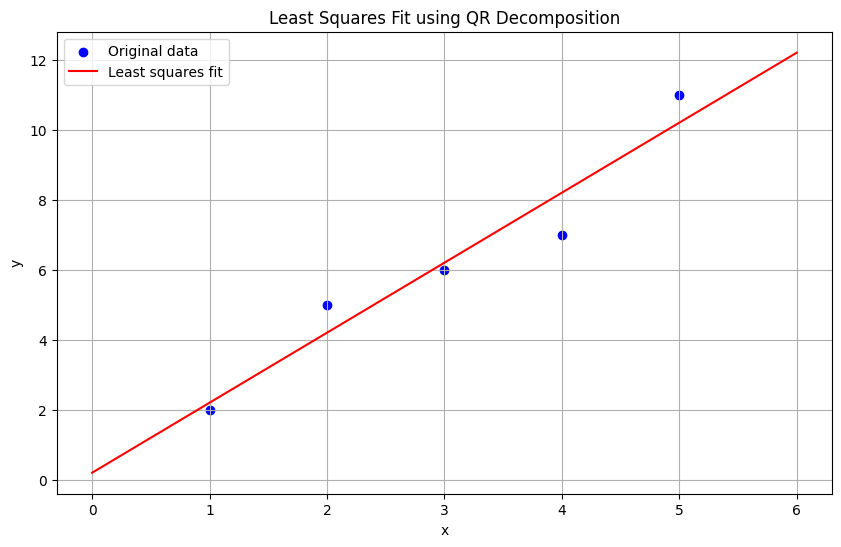


Fitted line equation: y = 2.0000x + 0.2000


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a small A matrix (5x2)
x = np.array([1, 2, 3, 4, 5])
A = np.column_stack((x, np.ones_like(x)))

#Based on how our A is setup, the first column means we will get an x value, and the second column means we will get a constant
print_matrix(A, "A matrix")


# Generate a b vector (5x1)
b = np.array([2, 5, 6, 7, 11])
#This b vector is like the actual values that we are trying to predict
print("B vector",b)

# Perform QR decomposition
Q, R = np.linalg.qr(A)
print_matrix(Q, "Q matrix")
print_matrix(R, "R matrix")


# Solve Rx = Q.T @ b
Q_T_b = Q.T @ b
solution = np.linalg.solve(R, Q_T_b)

print("\nSolution x:")
print(solution)


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, b, color='blue', label='Original data')

# Generate points for the fitted line
x_line = np.linspace(0, 6, 100)
y_line = solution[0] * x_line + solution[1]
plt.plot(x_line, y_line, color='red', label='Least squares fit')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit using QR Decomposition')
plt.legend()
plt.grid(True)
plt.show()

# Print the equation of the fitted line
m, c = solution
print(f"\nFitted line equation: y = {m:.4f}x + {c:.4f}")

# 1.3.3 Linear Regression
This is a statistical method that helps one model the relationshop between a dependent variable and one or more independent variables. It assumes a linear relationship.

The basic form is $Y = mx + b$ where $Y$ is the dependent variable, $x$ is the independent variable, $m$ is the slope, and $b$ is the y-intercept.

With the associated linear regression plot there is an $R^2$ which measures the proportion of variance, where 1 indicates a perfect fit while 0 indicates that the model has no match with the data.


Intercept: 10.06
Slope: 1.97
y = 1.97x + 10.06


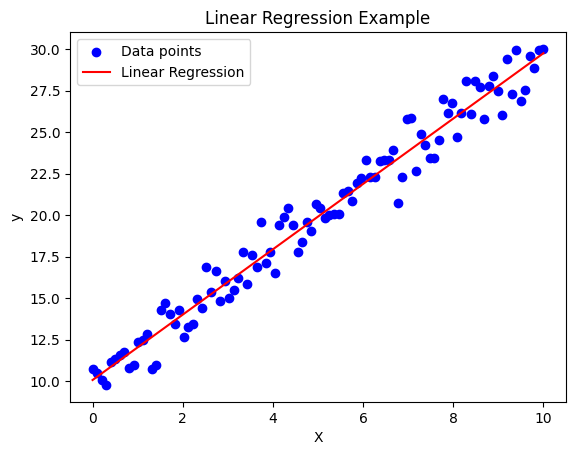

R-squared: 0.9697


In [8]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
#With this, the actual graph should be 2x + 10 but we are adding some random numbers so that we can get an approximate model
y = 2 * X + 10 + np.random.randn(100, 1)

# Add a column of ones to X for the y-intercept term
X_b = np.c_[np.ones((100, 1)), X]

# Calculate the coefficients using the normal equation
solution = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f"Intercept: {solution[0][0]:.2f}")
print(f"Slope: {solution[1][0]:.2f}")
print(f"y = {solution[1][0]:.2f}x + {solution[0][0]:.2f}")

X_new = np.array([[0], [10]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(solution)

# Plot the results
plt.scatter(X, y, color='b', label='Data points')
plt.plot(X_new, y_predict, color='r', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

# Calculate R-squared
y_pred = X_b.dot(solution)
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)
#Since the R^2 is 9.97 which is close to 1, then the model is a very good fit
print(f"R-squared: {r_squared:.4f}")